## Observations and Insights 

Through all the generated figures and tables,the following observations can be made:

Among the ten regimens adopted to treat tumors on mouse subjects,Capomulin and Remicane are the top two promising ones as we can tell form both summary statistics and the box plot that they got lower mean, median and standard deviation of tumor volumes than the other regimens.

The distribution of male and female mouse is pretty even, so we can say gender won't be a major contributor to the effectiveness of any drug regimen.

From the line plot we generated between tumor volume vs. time point for a mouse treated with Capomulin, we can tell regimen need to be used for twenty days before the effect shows and its tomor volume got reduced pretty quickly. But after twenty days, the value of tumor volume is getting higher. More analysis might need to be done about the trend of tumor volume vs time point for all the mouses treated with Capomulin.


In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="outer")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [33]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())


249

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_MouseID=combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicated_MouseID



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data["Mouse ID"]=="g989"]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data=combined_data.set_index("Mouse ID")
combined_data=combined_data.drop(index=["g989"],axis=0)
combined_data

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [37]:
# Checking the number of mice in the clean DataFrame.
combined_data=combined_data.reset_index()
len(combined_data["Mouse ID"].unique())
                

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Drug_group=combined_data.groupby("Drug Regimen")
Tumor_mean=Drug_group["Tumor Volume (mm3)"].mean()
Tumor_median=Drug_group["Tumor Volume (mm3)"].median()
Tumor_variance=Drug_group["Tumor Volume (mm3)"].var()
Tumor_std=Drug_group["Tumor Volume (mm3)"].std()
Tumor_sem=Drug_group["Tumor Volume (mm3)"].sem()
summary_df=pd.DataFrame({"Tumor_volume_mean":Tumor_mean,
                        "Tumor_volume_median":Tumor_median,
                        "Tumor_volume_variance":Tumor_variance,
                        "Tumor_volume_std":Tumor_std,
                        "Tumor_volume_sem":Tumor_sem})
summary_df







,Tumor_volume_mean,Tumor_volume_median,Tumor_volume_variance,Tumor_volume_std,Tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Drug_group.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Count of Measurements')

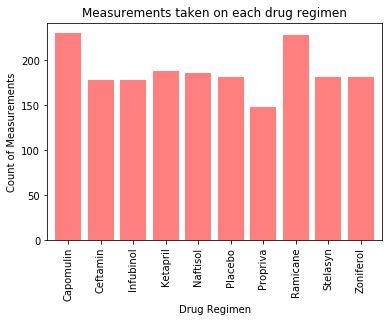

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_counts=Drug_group["Drug Regimen"].count()
measurements_bar=regimen_counts.plot(kind="bar",width=0.8,facecolor="red",alpha=0.5)
# measurements_bar=regimen_counts.plot(kind="bar",xlabel="Drug Regimen",ylabel="Total number of measurements",width=0.8,facecolor="red",alpha=0.5)
measurements_bar.set_title("Measurements taken on each drug regimen")
measurements_bar.set_ylabel("Count of Measurements")

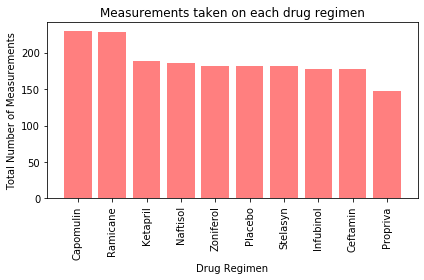

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
counts_data=combined_data["Drug Regimen"].value_counts()
counts_df=pd.DataFrame(counts_data)
counts_df=counts_df.reset_index()
counts_df=counts_df.rename(columns={"index":"Drug Regimen","Drug Regimen":"counts"})
x_values=counts_df["Drug Regimen"]
y_values=counts_df["counts"]
x_axis=np.arange(len(x_values))
tick_locations=[value for value in x_axis]
plt.bar(x_values,y_values,width=0.8,facecolor="red",alpha=0.5)
plt.xticks(tick_locations,(value for value in x_values),rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.title("Measurements taken on each drug regimen")
plt.tight_layout()


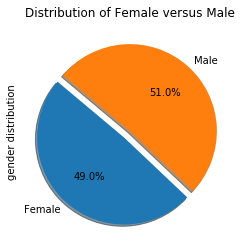

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups=combined_data.groupby("Sex")
gender_counts=gender_groups["Sex"].count()
explode=(0.1,0)
gender_pie=gender_counts.plot(kind="pie",title="Distribution of Female versus Male",explode=explode,autopct="%1.1f%%", shadow=True, startangle=140)
gender_pie.set_ylabel("gender distribution")
plt.show()


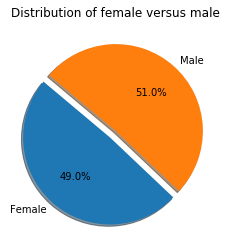

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode=(0.1,0)
labels=["Female","Male"]
plt.pie(gender_groups["Sex"].count(),explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of female versus male")
plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Mouse_group=combined_data.groupby("Mouse ID")
Last_timepoint=Mouse_group["Timepoint"].agg(["max"])
Last_timepoint=Last_timepoint.rename(columns={"max":"Timepoint"})
Last_timepoint


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [45]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Last_Timepoint_Data=Last_timepoint.merge(combined_data,how="inner", on=["Mouse ID","Timepoint"])
Last_Timepoint_Data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
Target_regimens=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Last_Tumor_Vol1=[]
Last_Tumor_Vol2=[]
Last_Tumor_Vol3=[]
Last_Tumor_Vol4=[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
# Locate the rows which contain mice on each drug and get the tumor volumes
for i in range(len(Last_Timepoint_Data)):
    if Last_Timepoint_Data.loc[i,"Drug Regimen"]== Target_regimens[0]:
        Last_Tumor_Vol1.append(Last_Timepoint_Data.loc[i,"Tumor Volume (mm3)"])
    elif Last_Timepoint_Data.loc[i,"Drug Regimen"]== Target_regimens[1]:
        Last_Tumor_Vol2.append(Last_Timepoint_Data.loc[i,"Tumor Volume (mm3)"])
    elif Last_Timepoint_Data.loc[i,"Drug Regimen"]== Target_regimens[2]:
        Last_Tumor_Vol3.append(Last_Timepoint_Data.loc[i,"Tumor Volume (mm3)"])
    elif Last_Timepoint_Data.loc[i,"Drug Regimen"]== Target_regimens[3]:
        Last_Tumor_Vol4.append(Last_Timepoint_Data.loc[i,"Tumor Volume (mm3)"])      
                                    
# # Determine outliers using upper and lower bounds
Last_Tumor_Vol1=pd.Series(Last_Tumor_Vol1)
Last_Tumor_Vol1=pd.Series(Last_Tumor_Vol1)
Last_Tumor_Vol2=pd.Series(Last_Tumor_Vol2)
Last_Tumor_Vol3=pd.Series(Last_Tumor_Vol3)
Last_Tumor_Vol4=pd.Series(Last_Tumor_Vol4)
def describe(list):
    quartiles=list.quantile([0.25,0.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    iqr = upperq-lowerq   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier=True
    for i in list:
        if i<lower_bound or i>upper_bound:
            print(i)
        else:
                outlier=False
    if outlier==False:
        print("none")
print(Target_regimens[0]+"'s potential outliers")
describe(Last_Tumor_Vol1)
print(Target_regimens[1]+"'s potential outliers")
describe(Last_Tumor_Vol2)
print(Target_regimens[2]+"'s potential outliers")
describe(Last_Tumor_Vol3)
print(Target_regimens[3]+"'s potential outliers")
describe(Last_Tumor_Vol4)

Capomulin's potential outliers
none
Ramicane's potential outliers
none
Infubinol's potential outliers
36.321345799999996
none
Ceftamin's potential outliers
none


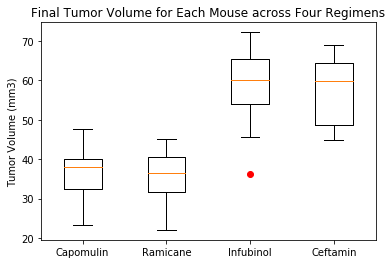

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Last_Tumor_Vol=[Last_Tumor_Vol1,Last_Tumor_Vol2,Last_Tumor_Vol3,Last_Tumor_Vol4]
fig, ax = plt.subplots()
#ax.boxplot(Last_Tumor_Vol,sym="red",manage_ticks=True,labels=Target_regimens)
ax.boxplot(Last_Tumor_Vol,sym="red",labels=Target_regimens)
ax.set_title("Final Tumor Volume for Each Mouse across Four Regimens")
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

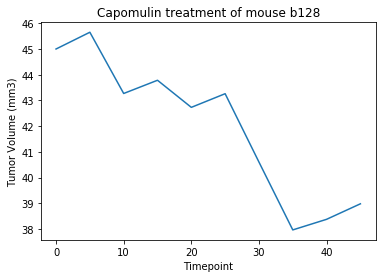

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# loop for a mouse treated with Capomulin
regimen_of_interest="Capomulin"
for i in range(len(Last_Timepoint_Data)):
    if Last_Timepoint_Data.loc[i,"Drug Regimen"]==regimen_of_interest:
        Mouse_of_interest=Last_Timepoint_Data.loc[i,"Mouse ID"]
        break
# gather data for line plot
Mouse_df=combined_data.loc[combined_data["Mouse ID"]==Mouse_of_interest]
# generate a line plot
plt.plot(Mouse_df["Timepoint"],Mouse_df["Tumor Volume (mm3)"])
#plt.title("Tumor Volume vs Timepoint for a mouse treated wit Capomulin")
plt.title("Capomulin treatment of mouse "+Mouse_of_interest)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

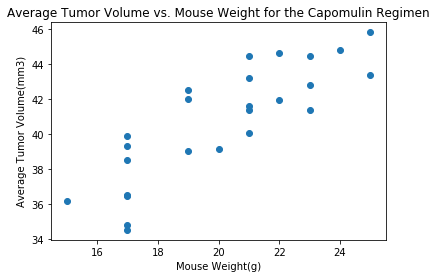

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
Capomulin_groups=Capomulin_df.groupby("Mouse ID")
x_values=Capomulin_groups["Weight (g)"].mean()
y_values=Capomulin_groups["Tumor Volume (mm3)"].mean()
plt.scatter(x_values,y_values)
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and averae tumor volume is 0.84


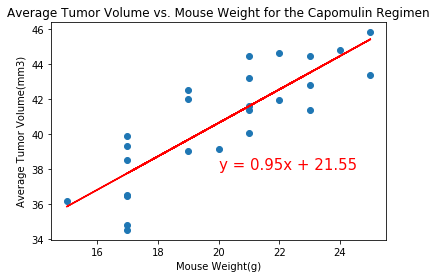

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values=Capomulin_groups["Weight (g)"].mean()
y_values=Capomulin_groups["Tumor Volume (mm3)"].mean()
r_value=st.pearsonr(x_values,y_values)[0]
print("The correlation between mouse weight and averae tumor volume is "
      +str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()

